In [2]:
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import PIL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
drive_path = '/content/drive/MyDrive'
tf.keras.utils.get_file('flower_photos', origin=dataset_url, 
                        cache_dir=drive_path, untar=True)         #untar = True to unzip the zip file

228827136/228813984 [==============================] - 2s 0us/step


'/content/drive/MyDrive/datasets/flower_photos'

FIST WE NEED TO GRAB ALL THE IMAGES


In [3]:
import pathlib

data_path = pathlib.Path('/content/drive/MyDrive/datasets/flower_photos')
data_path

PosixPath('/content/drive/MyDrive/datasets/flower_photos')

In [4]:
# to grab all the jpg images
list(data_path.glob('**/*.jpg'))

[PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/15674450867_0ced942941_n.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/14747962886_2bff6bb323_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flo

In [5]:
images = list(data_path.glob('**/*.jpg'))
print(f"We have {len(images)} images")

We have 3670 images


In [6]:
roses = list(data_path.glob('*roses/*.jpg'))
roses[:5]

[PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [7]:
str(roses[0])

'/content/drive/MyDrive/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'

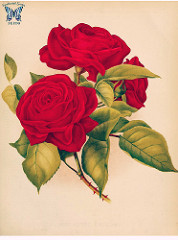

In [8]:
PIL.Image.open(str(roses[0]))

In [9]:
list(data_path.iterdir())

[PosixPath('/content/drive/MyDrive/datasets/flower_photos/roses'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/sunflowers'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/tulips'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/daisy'),
 PosixPath('/content/drive/MyDrive/datasets/flower_photos/dandelion')]

In [10]:
flower_images_paths = {
    'roses': list(data_path.glob('*roses/*.jpg')),
    'sunflowers': list(data_path.glob('*sunflowers/*.jpg')),
    'tulips': list(data_path.glob('*tulips/*.jpg')),
    'daisy': list(data_path.glob('*daisy/*.jpg')),
    'dandelion': list(data_path.glob('*dandelion/*.jpg')),
}

flower_labels = {
    'roses': 0,
    'dandelion': 1,
    'daisy': 2,
    'sunflowers':3,
    'tulips': 4
}

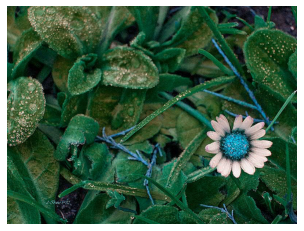

In [11]:
# using opencv to read in images
img = cv.imread(str(flower_images_paths['daisy'][15]))
plt.axis('off')
plt.imshow(img)
plt.show()

In [12]:
# a function which would resize the image
def get_resize_img(img):
  dimension = img.shape
  initial_area = dimension[0] * dimension[1]
  resize_shape = (180, 180)
  resized_area = 180 * 180
  if initial_area > resized_area:
    return cv.resize(img, resize_shape, interpolation=cv.INTER_AREA)
  else:
    return cv.resize(img, resize_shape, interpolation=cv.CUBIC_AREA)

In [13]:
# now we will go through all the flower_paths and read a image using opencv then store it in a x and store the corosponding label in y
x = []
y = []

for flower_name, flower_paths in flower_images_paths.items():
  for image_path in flower_paths:
    img = cv.imread(str(image_path))
    resized_img = get_resize_img(img)
    x.append(resized_img)
    label = flower_labels.get(flower_name)
    y.append(label)

In [14]:
# lets convert the x and y to numpy array for convinience

numpy_x = np.array(x, dtype='uint8')
numpy_y = np.array(y)
numpy_x.shape

(3670, 180, 180, 3)

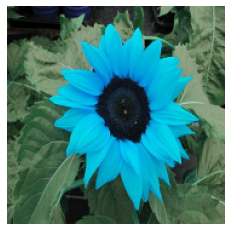

In [15]:
plt.axis('off')
plt.imshow(numpy_x[1320])
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(numpy_x, numpy_y, test_size=0.2, random_state=0)

In [17]:
len(x_train)

2936

In [18]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [97]:
cnn = keras.Sequential([
                        keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)),
                        keras.layers.MaxPooling2D(2),
                        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
                        keras.layers.MaxPooling2D(),
                        keras.layers.Conv2D(filters=62, kernel_size=(3, 3), padding='same', activation='relu'),
                        keras.layers.MaxPooling2D(),

                        keras.layers.Flatten(),

                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(5)

         ])

cnn.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [99]:
with tf.device('/CPU:0'):
  cnn.fit(x_train_scaled, y_train, epochs=3)
  print()
  print(cnn.evaluate(x_test_scaled, y_test))

Epoch 1/3
92/92 [==============================] - 76s 823ms/step - loss: 0.6538 - accuracy: 0.7561
Epoch 2/3
92/92 [==============================] - 74s 803ms/step - loss: 0.4446 - accuracy: 0.8454
Epoch 3/3
92/92 [==============================] - 73s 796ms/step - loss: 0.2594 - accuracy: 0.9125

23/23 [==============================] - 6s 255ms/step - loss: 1.3566 - accuracy: 0.6213
[1.356616497039795, 0.6212534308433533]


In [100]:
with tf.device('/GPU:0'):
  cnn.fit(x_train_scaled, y_train, epochs=30)
  print()
  print(cnn.evaluate(x_test_scaled, y_test))

Epoch 1/30
92/92 [==============================] - 2s 24ms/step - loss: 0.1424 - accuracy: 0.9564
Epoch 2/30
92/92 [==============================] - 2s 22ms/step - loss: 0.0792 - accuracy: 0.9768
Epoch 3/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0320 - accuracy: 0.9932
Epoch 4/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0436 - accuracy: 0.9891
Epoch 5/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0227 - accuracy: 0.9952
Epoch 6/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0125 - accuracy: 0.9983
Epoch 7/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 8/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0050 - accuracy: 0.9997
Epoch 9/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0035 - accuracy: 0.9997
Epoch 10/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 11/

In [102]:
predictions = cnn.predict(x_test_scaled)
predictions[:3]

array([[   28.509762, -3299.0283  ,  -578.5525  ,  3938.7837  ,
         1861.3754  ],
       [ 7586.6694  , -8262.736   ,  1810.054   , -2708.8496  ,
         5171.9536  ],
       [ 2538.012   , -5296.2207  ,  -263.99478 ,  2095.421   ,
         5549.353   ]], dtype=float32)

In [104]:
y_pred = tf.nn.softmax(predictions)
y_pred[:3]

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [107]:
y_pred_final = [np.argmax(y_p) for y_p in y_pred]
y_pred_final[:3]

[3, 0, 4]

In [112]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       151
           1       0.70      0.22      0.34       176
           2       0.44      0.79      0.56       113
           3       0.62      0.80      0.70       142
           4       0.58      0.60      0.59       152

    accuracy                           0.56       734
   macro avg       0.59      0.59      0.55       734
weighted avg       0.60      0.56      0.54       734



THE TEST SCORE IS VERY LOW WHICH MEANS THAT THE DATA IS OVERFITTING LETS
USE DATA AUGMENTAION TO FIX THAT

In [19]:
data_augmentaion = keras.Sequential([
                        keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
                        keras.layers.experimental.preprocessing.RandomRotation(0.1),
                        keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

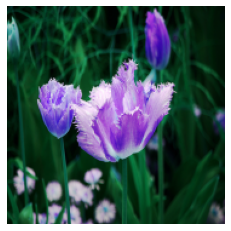

In [20]:
plt.axis('off')
plt.imshow(numpy_x[1550])
plt.show()

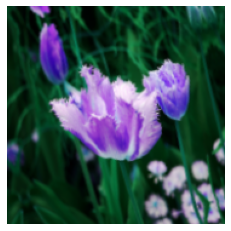

In [21]:
# applying random data augmentation
plt.axis('off')
new_image = data_augmentaion(x[1550]).numpy().astype('uint8') # we need to convert the array return from tensorflow and convert it to numpy 
                                                            # array for the picture to show
plt.imshow(new_image)
plt.show()


In [22]:
data_augmentaion = keras.Sequential([
                        keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
                        keras.layers.experimental.preprocessing.RandomRotation(0.1),
                        keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [23]:
cnn = keras.Sequential([
                        
                        data_augmentaion,

                        keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)),
                        keras.layers.MaxPooling2D(2),
                        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
                        keras.layers.MaxPooling2D(),
                        keras.layers.Conv2D(filters=62, kernel_size=(3, 3), padding='same', activation='relu'),
                        keras.layers.MaxPooling2D(),

                        keras.layers.Dropout(0.2),

                        keras.layers.Flatten(),

                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(5)

         ])

cnn.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)


In [29]:
cnn.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 3s 27ms/step - loss: 0.1858 - accuracy: 0.9315
Epoch 2/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1747 - accuracy: 0.9424
Epoch 3/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1827 - accuracy: 0.9349
Epoch 4/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1722 - accuracy: 0.9353
Epoch 5/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1667 - accuracy: 0.9411
Epoch 6/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1510 - accuracy: 0.9469
Epoch 7/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1779 - accuracy: 0.9394
Epoch 8/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1532 - accuracy: 0.9421
Epoch 9/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1771 - accuracy: 0.9322
Epoch 10/30
92/92 [==============================] - 2s 26ms/step - loss: 0.1541 - accuracy: 0.9496
Epoch 11/

In [30]:
cnn.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 0s 14ms/step - loss: 1.4127 - accuracy: 0.7561


[1.4127261638641357, 0.7561308145523071]

In [31]:
predictions = cnn.predict(x_test_scaled)
y_pred = tf.nn.softmax(predictions)
y_pred_final = [np.argmax(y_p) for y_p in y_pred]

In [32]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       151
           1       0.78      0.80      0.79       176
           2       0.77      0.79      0.78       113
           3       0.83      0.85      0.84       142
           4       0.66      0.72      0.69       152

    accuracy                           0.76       734
   macro avg       0.76      0.76      0.76       734
weighted avg       0.76      0.76      0.76       734

